In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from abba import ABBA

In [10]:
np.random.seed(42)
torch.manual_seed(42)

N = 200
t = np.linspace(0, 20, N)
series = np.sin(t)# + 0.1 * np.random.randn(N)


In [16]:
n_symbols = 12
window_size = 20

abba = ABBA(n_symbols=n_symbols, window_size=window_size)
symbol_sequence = abba.fit(series)  # sequence symbolique


In [17]:
symbol_sequence

array([ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  8,  8,  5,  5,
        5,  2,  2,  2,  7,  6,  6,  6, 10, 10, 10, 11, 11, 11, 11,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,  4,  4,
        4,  7,  7,  7,  7,  9,  9,  9,  5,  5,  8,  8,  8,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  8,  8,  8,  5,  5,  5,  2,  2,  2,  2,  7,
        6,  6,  6, 10, 10, 10, 11, 11, 11,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  1,  1,  1,  1,  4,  4,  4,  4,  7,  7,  7,  9,
        9,  9,  5,  5,  8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  8,  8,  8,  5,  5,  5,  2,  2,  2,  7,  6,  6,  6, 10, 10, 10,
       11, 11, 11, 11,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  1,
        1,  1,  1,  1,  4,  4,  4,  7,  7,  7,  7], dtype=int32)

In [18]:
recon_smooth = abba.inverse_transform_smooth(symbol_sequence)

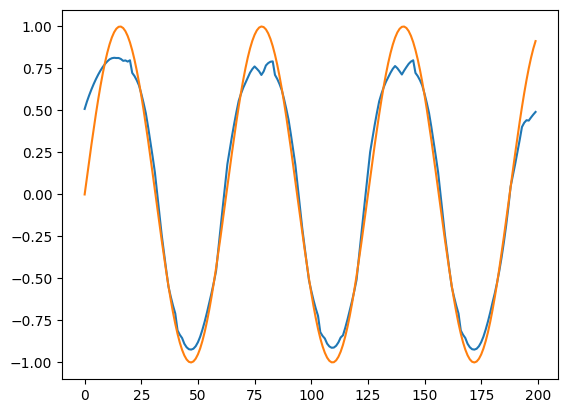

In [19]:
plt.plot(recon_smooth)
plt.plot(series)

In [20]:
from models.LSTM import TimeSeriesLSTM
from train_LSTM import train_model

model = TimeSeriesLSTM()
train_model(model, series, 10, device='cuda')

/home/onyxia/work/ABBA_LSTM/utils/data_handler.py:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  X = torch.tensor(X).unsqueeze(-1)


Epoch [10/200] Train: 0.121477 Val: 0.138953
Epoch [20/200] Train: 0.049264 Val: 0.063896
Epoch [30/200] Train: 0.002389 Val: 0.003041
Epoch [40/200] Train: 0.000966 Val: 0.001147
Epoch [50/200] Train: 0.000636 Val: 0.000784
Epoch [60/200] Train: 0.000448 Val: 0.000556
Epoch [70/200] Train: 0.000324 Val: 0.000402
Epoch [80/200] Train: 0.000236 Val: 0.000291
Epoch [90/200] Train: 0.000171 Val: 0.000208
Epoch [100/200] Train: 0.000123 Val: 0.000146
Epoch [110/200] Train: 0.000088 Val: 0.000099
Epoch [120/200] Train: 0.000087 Val: 0.000062
Epoch [130/200] Train: 0.000058 Val: 0.000038
Epoch [140/200] Train: 0.000052 Val: 0.000027
Epoch [150/200] Train: 0.000039 Val: 0.000019
Epoch [160/200] Train: 0.000023 Val: 0.000011
Epoch [170/200] Train: 0.000078 Val: 0.000010
Epoch [180/200] Train: 0.000012 Val: 0.000006
Epoch [190/200] Train: 0.000009 Val: 0.000004
Epoch [200/200] Train: 0.000229 Val: 0.000028


In [22]:
lag=10
initial_series = torch.tensor(series[-lag:], dtype=torch.float).unsqueeze(0)  # batch=1
forecast = model.forecast(initial_series, horizon=20)

RuntimeError: Tensors must have same number of dimensions: got 2 and 1